### Import packages

In [1]:
import torch
from dagma import utils
from dagma.linear import DagmaLinear
from dagma.nonlinear import DagmaMLP, DagmaNonlinear
import numpy as np
from auxiliary_funcs import *
from auxiliary_funcs import SyntheticDataset

### Generate data

In [2]:
utils.set_random_seed(1)
# Create an Erdos-Renyi DAG of 20 nodes and 20 edges in expectation with Gaussian noise
# number of samples n = 500
n, d, s0 = 500, 20, 20 
graph_type, sem_type = 'ER', 'gauss'

B_true = utils.simulate_dag(d, s0, graph_type)
W_true = utils.simulate_parameter(B_true)
X = utils.simulate_linear_sem(W_true, n, sem_type)

### Test Linear Model

In [10]:
model = DagmaLinear(loss_type='l2') # create a linear model with least squares loss
W_est = model.fit(X, lambda1=0.02) # fit the model with L1 reg. (coeff. 0.02)
acc = utils.count_accuracy(B_true, W_est != 0) # compute metrics of estimated adjacency matrix W_est with ground-truth
print(acc)

  0%|          | 0/180000.0 [00:00<?, ?it/s]

{'fdr': 0.0, 'tpr': 1.0, 'fpr': 0.0, 'shd': 0, 'nnz': 20}


### Test Nonlinear Model

In [5]:
# note: using torch.double instead of torch.float gives better result for larger num of nodes
eq_model = DagmaMLP(dims=[d, 10, 1], bias=True, dtype=torch.double) # create the model for the structural equations, in this case MLPs
model = DagmaNonlinear(eq_model, dtype=torch.double) # create the model for DAG learning
W_est = model.fit(X, lambda1=0.02, lambda2=0.005) # fit the model with L1 reg. (coeff. 0.02) and L2 reg. (coeff. 0.005)
acc = utils.count_accuracy(B_true, W_est != 0) # compute metrics of estimated adjacency matrix W_est with ground-truth
print(acc)

### fmri nonlinear

In [20]:
num_sub = 1
sub_id = 5
num_samples = int(1200/num_sub)
X1 = np.load('Data/mean1_dataset.npy')[:num_samples,:,sub_id]
X2 = np.load('Data/mean2_dataset.npy')[:num_samples,:,sub_id]
X = np.concatenate((X1 , X2) , 0)
for i in range(1,num_sub):
    if i !=sub_id :
        X1 = np.load('Data/mean1_dataset.npy')[:num_samples,:,i]
        X2 = np.load('Data/mean2_dataset.npy')[:num_samples,:,i]
        X = np.concatenate((X , X1 , X2) , 0)
    
# model = DagmaLinear(loss_type='l2')
eq_model = DagmaMLP(dims=[d, 20, 1], bias=True, dtype=torch.double) 
model = DagmaNonlinear(eq_model, dtype=torch.double)

W_est = model.fit(X, lambda1=0.01 , w_threshold = 0.00001) 

results_folder = 'outcomes/'
file_name = 'mean1and2_sub3_ldagma_10T1_'
np.save(results_folder + file_name , np.expand_dims(W_est,2))

  0%|          | 0/180000.0 [00:00<?, ?it/s]

In [9]:
num_sub = 20
num_samples = 1200
# int(1200/num_sub)
X = np.load('Data/mean1_dataset.npy')[:num_samples,:,0]
for i in range(1,num_sub):
    X1 = np.load('Data/mean1_dataset.npy')[:num_samples,:,i]
    X = np.concatenate((X , X1) , 0)


# model = DagmaLinear(loss_type='l2')
eq_model = DagmaMLP(dims=[d, 20, 1], bias=True, dtype=torch.double) 
model = DagmaNonlinear(eq_model, dtype=torch.double)

W_est = model.fit(X, lambda1=0.01 , w_threshold = 0.00001) 

results_folder = 'outcomes/'
file_name = 'mean1_20subs_ldagma_10T1_'
np.save(results_folder + file_name , np.expand_dims(W_est,2))

  0%|          | 0/180000.0 [00:00<?, ?it/s]

In [27]:
num_sub = 1
sub_id = 5
num_samples = int(1200/num_sub)
X = np.load('Data/mean1_dataset.npy')[:num_samples,:,sub_id]
for i in range(1,num_sub):
    X1 = np.load('Data/mean1_dataset.npy')[:num_samples,:,sub_id]
    X = np.concatenate((X , X1) , 0)


# model = DagmaLinear(loss_type='l2')
d= X.shape[1]
eq_model = DagmaMLP(dims=[d, 20, 1], bias=True, dtype=torch.double) 
model = DagmaNonlinear(eq_model, dtype=torch.double)

W_est = model.fit(X, lambda1=0.01 , w_threshold = 0.00001) 

results_folder = 'outcomes/'
file_name = 'mean1_sub1_nldagma_20T1_'
np.save(results_folder + file_name , np.expand_dims(W_est,2))

  0%|          | 0/230000.0 [00:00<?, ?it/s]

### mainpart

In [37]:
d = X.shape[1]
# eq_model = DagmaMLP(dims=[d, 10, 1], bias=True, dtype=torch.double)
# model = DagmaNonlinear(eq_model, dtype=torch.double) 
# W_est = model.fit(X, lambda1=0.02, lambda2=0.005)

model = DagmaLinear(loss_type='l2')
W_est = model.fit(X, lambda1=0.001) 

  0%|          | 0/180000.0 [00:00<?, ?it/s]

In [41]:
results_folder = 'outcomes/'
file_name = 'mean1and2_sub1_ldagma_10T1_2'
np.save(results_folder + file_name , np.expand_dims(W_est,2))

In [42]:
data_folder = 'Data/'  
add_estm = results_folder + file_name 
add_strc = data_folder + "s_c_final_80.npy"
B_est = pfdr_(add_estm , add_strc ,num_ed = 1 ,num_div =0)

estimated matrix edges are  :  64
estimated matrix edges are  :  128
num_div is :  1
conn is :  2888.0
pfdr percentage is : 2.7700831024930745
**********


## plot 

In [3]:
n_edges = 120

In [21]:
results_folder = 'outcomes/'
file_name = 'mean1and2_sub3_ldagma_10T1_'
data_folder = 'Data/'  
add_estm = results_folder + file_name 
add_strc = data_folder + "s_c_final_80.npy"

B_est = pfdr_(add_estm , add_strc ,num_ed = 100 ,num_div =0 , th = 0)
# connectivity_map(add1 = add_strc , add2 = add_estm ,
#                  edges = n_edges , name1 = 'Structural' , name2 = 'Estimated' , th =0)

estimated matrix edges are  :  12077
estimated matrix edges are  :  23490
num_div is :  1
expected num edges is :  2888
real num edges is :  2888
num of diff_est_strc   2244
pfdr percentage is : 77.70083102493075
**********
num_div is :  2
expected num edges is :  1444
real num edges is :  1444
num of diff_est_strc   1046
pfdr percentage is : 72.4376731301939
**********
num_div is :  3
expected num edges is :  962
real num edges is :  962
num of diff_est_strc   662
pfdr percentage is : 68.81496881496881
**********
num_div is :  4
expected num edges is :  722
real num edges is :  722
num of diff_est_strc   476
pfdr percentage is : 65.92797783933518
**********
num_div is :  5
expected num edges is :  577
real num edges is :  576
num of diff_est_strc   372
pfdr percentage is : 64.58333333333334
**********
num_div is :  6
expected num edges is :  481
real num edges is :  480
num of diff_est_strc   298
pfdr percentage is : 62.083333333333336
**********
num_div is :  7
expected num edges is 

In [10]:
results_folder = 'outcomes/'
file_name = 'mean1_20subs_ldagma_10T1_'
data_folder = 'Data/'  
add_estm = results_folder + file_name 
add_strc = data_folder + "s_c_final_80.npy"

B_est = pfdr_(add_estm , add_strc ,num_ed = 100 ,num_div =0 , th = 0)
# connectivity_map(add1 = add_strc , add2 = add_estm ,
#                  edges = n_edges , name1 = 'Structural' , name2 = 'Estimated' , th =0)

estimated matrix edges are  :  12087
estimated matrix edges are  :  21560
num_div is :  1
expected num edges is :  2888
real num edges is :  2888
num of diff_est_strc   2128
pfdr percentage is : 73.68421052631578
**********
num_div is :  2
expected num edges is :  1444
real num edges is :  1444
num of diff_est_strc   964
pfdr percentage is : 66.7590027700831
**********
num_div is :  3
expected num edges is :  962
real num edges is :  962
num of diff_est_strc   620
pfdr percentage is : 64.44906444906445
**********
num_div is :  4
expected num edges is :  722
real num edges is :  722
num of diff_est_strc   436
pfdr percentage is : 60.387811634349035
**********
num_div is :  5
expected num edges is :  577
real num edges is :  576
num of diff_est_strc   328
pfdr percentage is : 56.94444444444444
**********
num_div is :  6
expected num edges is :  481
real num edges is :  480
num of diff_est_strc   272
pfdr percentage is : 56.666666666666664
**********
num_div is :  7
expected num edges is 

wrong edges count is :  12
**********


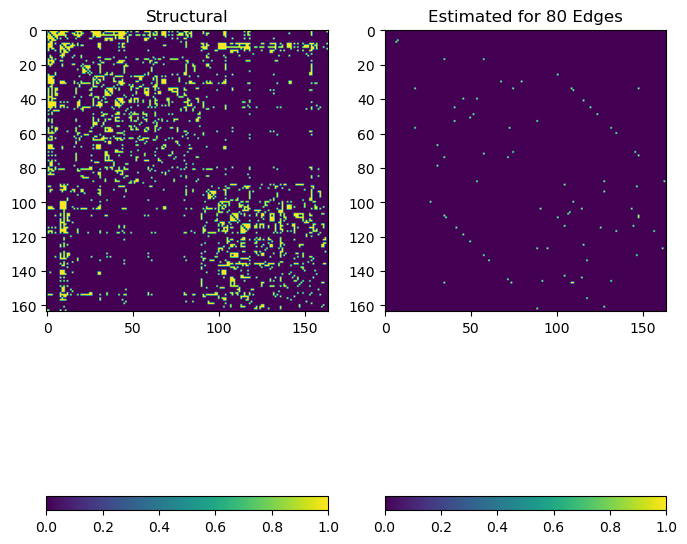

In [56]:
results_folder = 'outcomes/'
file_name = 'mean1_sub1_nldagma_20T1_'
data_folder = 'Data/'  
add_estm = results_folder + file_name 
add_strc = data_folder + "s_c_final_80.npy"
n_edges = 80
# B_est = pfdr_(add_estm , add_strc ,num_ed = 100 ,num_div =0 , th = 0)
connectivity_map(add1 = add_strc , add2 = add_estm ,
                 edges = n_edges, name1 = 'Structural' , name2 = 'Estimated' , th =0)

wrong edges count is :  15
**********


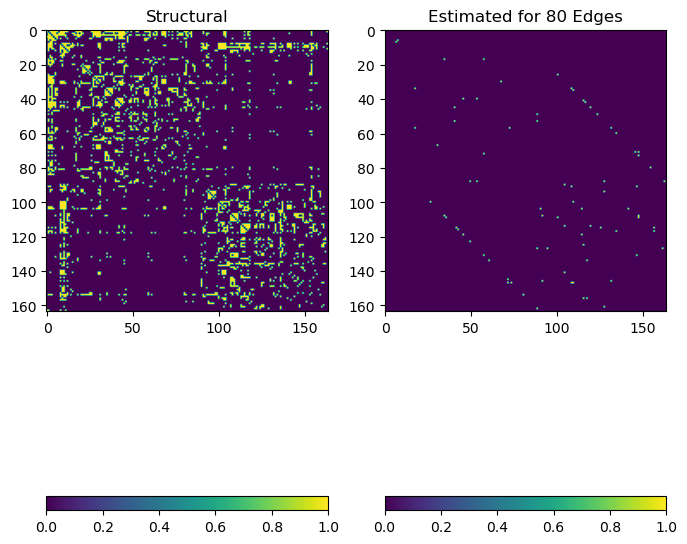

In [57]:
results_folder = 'outcomes/'
file_name = 'mean1_sub1_ldagma_10T1_'
data_folder = 'Data/'  
add_estm = results_folder + file_name 
add_strc = data_folder + "s_c_final_80.npy"

# B_est = pfdr_(add_estm , add_strc ,num_ed = 100 ,num_div =0 , th = 0)
connectivity_map(add1 = add_strc , add2 = add_estm ,
                 edges = n_edges , name1 = 'Structural' , name2 = 'Estimated' , th =0)